## equity price in sector

In [1]:
# Provides ways to work with large multidimensional arrays
import numpy as np 
# Allows for further data manipulation and analysis
import pandas as pd 
import matplotlib.pyplot as plt # Plotting
import matplotlib.dates as mdates # Styling dates
%matplotlib inline

# pip install numpy
# conda install -c anaconda pandas
# conda install -c conda-forge matplotlib

import datetime as dt # For defining dates

import time

# In Powershell Prompt : conda install -c conda-forge multitasking
# pip install -i https://pypi.anaconda.org/ranaroussi/simple yfinance

import yfinance as yf

# To show all your output File -> Preferences -> Settings Search for Notebook
# Notebook Output Text Line Limit and set to 100

# Used for file handling like deleting files
import os

# conda install -c conda-forge cufflinks-py
# conda install -c plotly plotly
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()

from plotly.subplots import make_subplots

# New Imports
# Used to get data from a directory
import os
from os import listdir
from os.path import isfile, join

import warnings
warnings.simplefilter("ignore")


import os
import sys
import seaborn as sns
# from pathlib import Path
# _this_dir = Path(__file__).parent.parent
from dataset.us_equity_load import *
from utils.config import us_equity_research_folder

                   SMCI         NVDA         TSLA         VRT         PWR  \
date                                                                        
2024-05-29  4268.990638  3172.766225  1291.999383  923.908729  689.015058   

                   PDD        KLAC         LLY        MRNA        MPWR  ...  \
date                                                                    ...   
2024-05-29  657.107146  647.035487  602.684253  581.658954  535.179994  ...   

                  FDX        SAP        DIA        WMB       COF       TCOM  \
date                                                                          
2024-05-29  53.606561  53.215288  53.054475  52.471482  51.66591  50.807166   

                  AIG        HSY        ADP         IX  
date                                                    
2024-05-29  50.271215  50.178457  50.178272  50.064109  

[1 rows x 264 columns]


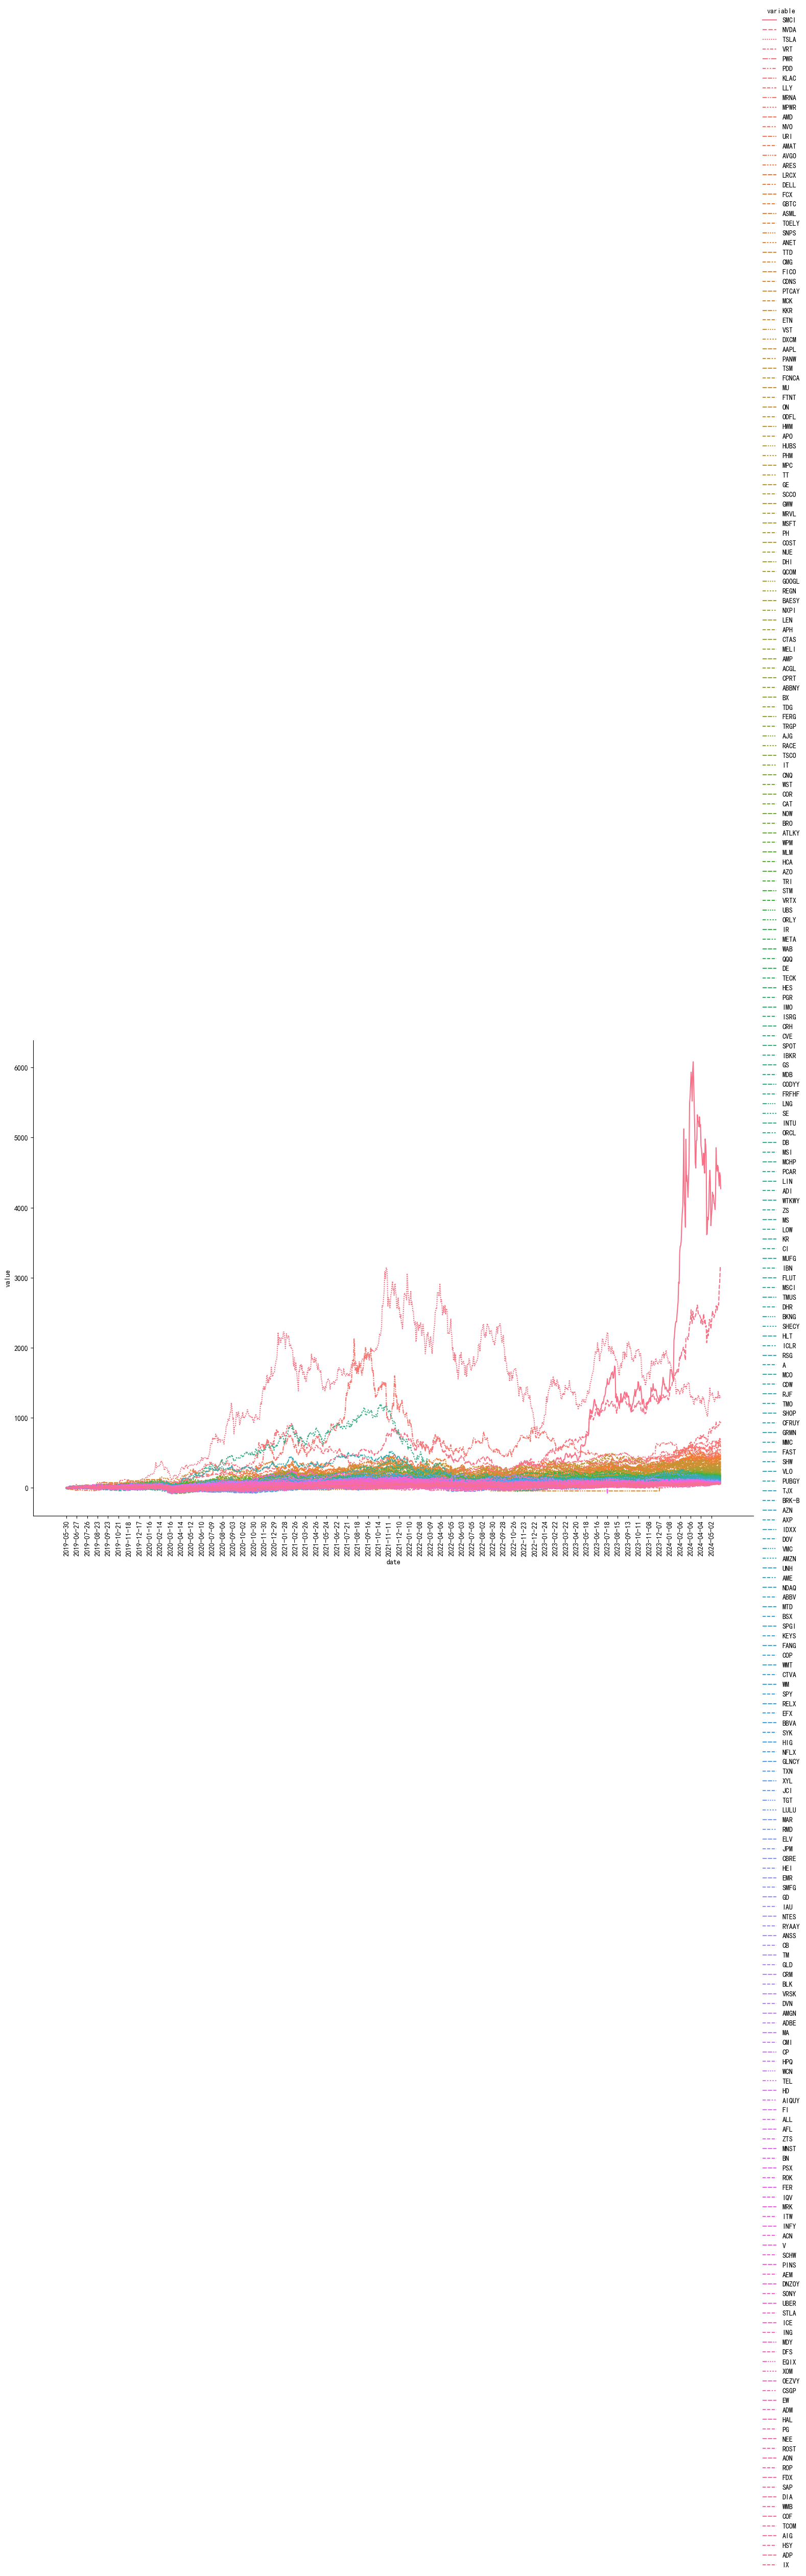

In [2]:
symbols = ["AMZN", "AAPL", "NFLX", "GOOG"]
symbols = ["MSFT", "AAPL", "NVDA", "GOOG","AMZN","META","BRK-B","TSM"]
symbols = us_equity_symbol_load().head(500)
# data = us_equity_daily_data_load(symbols = symbols, option = 'close')
start_date = '2019-05-29'
end_date = '2024-05-29'
data = us_equity_daily_data_load(symbols = symbols, start_date = start_date, end_date = end_date, option = 'close')
data = pd.DataFrame(data)
data = data.sub(data.iloc[0, :], axis=1).div(data.iloc[0, :], axis=1) * 100

sorted_columns = data.iloc[-1].sort_values(ascending=False).index
data = data[sorted_columns]
data = data.loc[:, data.iloc[-1] > 50]

folder = us_equity_research_folder(sub_folder = "price")
result_file = os.path.join(folder, "price_perf_" + start_date + "_" + end_date + ".csv")
data.to_csv(result_file)

print(data.tail(1))

# Convert the DataFrame to long format
df_long = data.reset_index().melt(id_vars='date', var_name='variable', value_name='value')

# Create a line plot using Seaborn's relplot
g = sns.relplot(
    data=df_long, 
    x='date', 
    y='value', 
    hue='variable', 
    kind='line',
    style='variable',  # Different line styles for each variable
    height=10,    # Height of each facet
    aspect=1.5  # Aspect ratio of each facet
)


# Rotate x-axis labels and set only a subset of ticks
for ax in g.axes.flat:
    x = data.index[1:-1:20]
    ax.set_xticks(x)  # Set the desired tick positions
    ax.set_xticklabels(x)  # Set the desired tick labels
    for label in ax.get_xticklabels():
        label.set_rotation(90)

# Show the plot
# plt.show()

                   NVDA         TSLA         PDD        KLAC         LLY
date                                                                    
2024-05-15  2597.164066  1274.618179  607.207239  634.809919  581.461628
2024-05-16  2589.440078  1281.333581  617.617658  624.905682  567.694181
2024-05-17  2535.855785  1302.033126  631.681711  623.164713  566.724404
2024-05-20  2601.439397  1282.202647  634.584623  647.461062  578.136641
2024-05-21  2618.711729  1374.244223  627.977979  640.052248  595.445491
2024-05-22  2606.284808  1322.969557  636.186185  646.406835  595.220355
2024-05-23  2858.500833  1272.643039  668.918961  640.013522  600.017341
2024-05-24  2934.601594  1316.096110  688.638693  653.515816  599.134131
2024-05-28  3146.430211  1296.423676  649.349373  660.363690  599.506451
2024-05-29  3172.766225  1291.999383  657.107146  647.035487  602.684253


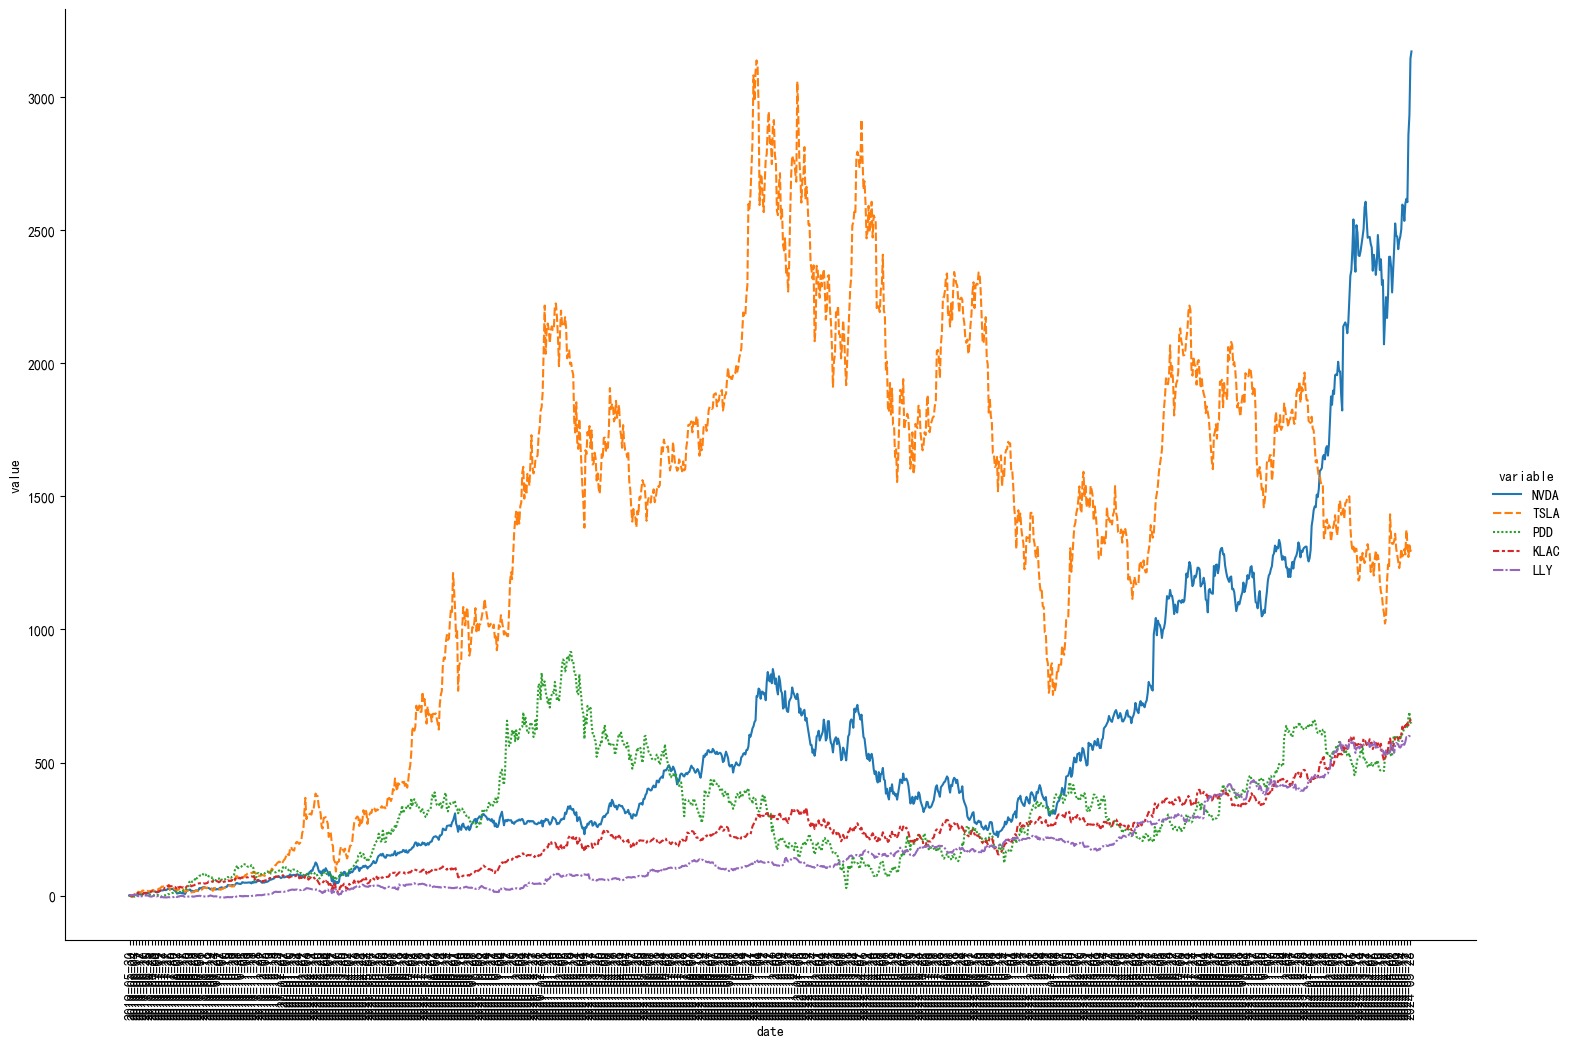

In [6]:
symbols = ["AMZN", "AAPL", "NFLX", "GOOG"]
symbols = ["MSFT", "AAPL", "NVDA", "GOOG","AMZN","META","BRK-B","TSM"]
symbols = us_equity_symbol_load().head(200)
# symbols = us_equity_symbol_load()
# data = us_equity_daily_data_load(symbols = symbols, option = 'close')
start_date = '2019-05-29'
end_date = '2024-05-29'
data = us_equity_daily_data_load(symbols = symbols, start_date = start_date, end_date = end_date, option = 'close')
data = pd.DataFrame(data)
data = data.dropna(axis=1)
data = data.sub(data.iloc[0, :], axis=1).div(data.iloc[0, :], axis=1) * 100

sorted_columns = data.iloc[-1].sort_values(ascending=False).index
data = data[sorted_columns]

data = data.loc[:, data.iloc[-1] > 500]
print(data.tail(10))


# Convert the DataFrame to long format
df_long = data.reset_index().melt(id_vars='date', var_name='variable', value_name='value')

# Create a line plot using Seaborn's relplot
g = sns.relplot(
    data=df_long, 
    x='date', 
    y='value', 
    hue='variable', 
    kind='line',
    style='variable',  # Different line styles for each variable
    height=10,    # Height of each facet
    aspect=1.5  # Aspect ratio of each facet
)


# Rotate x-axis labels and set only a subset of ticks
for ax in g.axes.flat:
    x = data.index[1:-1:3]
    ax.set_xticks(x)  # Set the desired tick positions
    ax.set_xticklabels(x)  # Set the desired tick labels
    for label in ax.get_xticklabels():
        label.set_rotation(90)